<a href="https://colab.research.google.com/github/yashaswi2000/Text_summarisation/blob/exp/Ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os

In [0]:
 ! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"makulayashaswi","key":"bb915eb90d35cc5dddc88c940585192e"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d pariza/bbc-news-summary

bbc-news-summary.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip bbc-news-summary.zip

Streaming output truncated to the last 5000 lines.
  inflating: BBC News Summary/Summaries/sport/364.txt  
  inflating: BBC News Summary/Summaries/sport/365.txt  
  inflating: BBC News Summary/Summaries/sport/366.txt  
  inflating: BBC News Summary/Summaries/sport/367.txt  
  inflating: BBC News Summary/Summaries/sport/368.txt  
  inflating: BBC News Summary/Summaries/sport/369.txt  
  inflating: BBC News Summary/Summaries/sport/370.txt  
  inflating: BBC News Summary/Summaries/sport/371.txt  
  inflating: BBC News Summary/Summaries/sport/372.txt  
  inflating: BBC News Summary/Summaries/sport/373.txt  
  inflating: BBC News Summary/Summaries/sport/374.txt  
  inflating: BBC News Summary/Summaries/sport/375.txt  
  inflating: BBC News Summary/Summaries/sport/376.txt  
  inflating: BBC News Summary/Summaries/sport/377.txt  
  inflating: BBC News Summary/Summaries/sport/378.txt  
  inflating: BBC News Summary/Summaries/sport/379.txt  
  inflating: BBC News Summary/Summaries/sport/380.txt

In [8]:
data_path = "./BBC News Summary"
folders = os.listdir(data_path)
article_path = os.path.join(data_path,folders[0])
summary_path = os.path.join(data_path,folders[1])
categories = os.listdir(article_path)
article_list = []
summary_list = []
for i in categories:
  article_files = os.listdir(article_path + '/' + i)
  summary_files = os.listdir(summary_path + '/' + i)
  for j in range(len(article_files)):
    file_path_1 = article_path + '/' + i + '/' + article_files[j]
    file_path_2 = summary_path + '/' + i + '/' + summary_files[j]
    #print(file_path_1)
    try:
        
        f = open(file_path_1)
        article_list.append(' '.join(f.read().splitlines()))
        f = open(file_path_2)
        summary_list.append(' '.join(f.read().splitlines()))
        
    except:
        print("error") 
d = {'article':article_list,'summary':summary_list}
df = pd.DataFrame(d)
df

error


,article,summary
0,Women MPs reveal sexist taunts Women MPs endu...,But she said there was a difference between th...
1,UK heading wrong way - Howard Tony Blair has ...,Tony Blair has had the chance to tackle the pr...
2,Blair stresses prosperity goals Tony Blair sa...,Mr Peston's book claimed that Mr Brown told Mr...
3,UK 'needs true immigration data' A former Hom...,"She said this would counter ""so-called indepen..."
4,Ministers lose slopping out case The Scottish...,Executive ministers raised an appeal arguing t...
...,...,...
2219,Sculthorpe wants Lions captaincy Paul Scultho...,Sculthorpe said the rugby league world would u...
2220,Butler strikes gold in Spain Britain's Kathy ...,Gelete Burka then crowned a great day for Ethi...
2221,McLeish ready for criticism Rangers manager A...,McLeish admitted his team's defending was amat...
2222,Venus stunned by Farina Elia Venus Williams s...,"""She (Kuznetsova) is a great player,"" she said..."


In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


In [10]:
df['article'][:10]

0    Women MPs reveal sexist taunts  Women MPs endu...
1    UK heading wrong way - Howard  Tony Blair has ...
2    Blair stresses prosperity goals  Tony Blair sa...
3    UK 'needs true immigration data'  A former Hom...
4    Ministers lose slopping out case  The Scottish...
5    Goldsmith: 'I was not leant on'  The attorney ...
6    Brown outlines third term vision  Gordon Brown...
7    Nat Insurance to rise, say Tories  National In...
8    Labour accused of broken pledge  Labour has al...
9    Labour chooses Manchester  The Labour Party wi...
Name: article, dtype: object

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [13]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df['article']:
    cleaned_text.append(text_cleaner(t))

cleaned_text[0]

'women mps reveal sexist taunts women mps endure shocking levels sexist abuse hands male counterparts new study shows male mps pretended juggle imaginary breasts jeered melons women made commons speeches researchers birkbeck college told labour yvette cooper said found hard persuade commons officials minister secretary mps gave answers hours taped interviews study whose secretary minister research team professor joni lovenduski set look achievements experiences women westminster emerged complaints mps parties sexist barracking chamber sexist insults patronising assumptions abilities barbara follet one called blair babes elected told researchers remember conservatives whenever labour woman got speak would take breasts imaginary breasts hands wiggle say melons spoke former liberal democrat jackie ballard recalled stream remarks leading topics women legs sexual persuasion tory education secretary gillian shepherd remembered one male colleagues called women betty said look know name betty 

In [14]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in df['summary']:
    cleaned_summary.append(summary_cleaner(t))

cleaned_summary[0]

'but she said there was difference between the experiences of women before the intake and afterwards even after the great influx of women mps at the general election and greater numbers of women in the cabinet female mps often say they feel stuck on the edge of male world this was mainly because there were more women present in parliament who were not prepared to put up with the sexist attitudes they came across prof lovenduski said male mps pretended to juggle imaginary breasts and jeered melons as women made commons speeches researchers from birkbeck college were told prof joni lovenduski who conducted the study with the help of margaret moran mp and team of journalists said she was shocked at the findings but she added some women including the women who came in received extraordinary treatment and am not convinced that if the number of women changed back to what it was before that things would not change back labour yvette cooper said she found it hard to persuade commons officials 

In [0]:
df['cleaned_article']=cleaned_text
df['cleaned_summary']=cleaned_summary

In [0]:
df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [17]:
for i in range(5):
    print("article:",df['cleaned_article'][i])
    print("Summary:",df['cleaned_summary'][i])
    print("\n")

article: women mps reveal sexist taunts women mps endure shocking levels sexist abuse hands male counterparts new study shows male mps pretended juggle imaginary breasts jeered melons women made commons speeches researchers birkbeck college told labour yvette cooper said found hard persuade commons officials minister secretary mps gave answers hours taped interviews study whose secretary minister research team professor joni lovenduski set look achievements experiences women westminster emerged complaints mps parties sexist barracking chamber sexist insults patronising assumptions abilities barbara follet one called blair babes elected told researchers remember conservatives whenever labour woman got speak would take breasts imaginary breasts hands wiggle say melons spoke former liberal democrat jackie ballard recalled stream remarks leading topics women legs sexual persuasion tory education secretary gillian shepherd remembered one male colleagues called women betty said look know nam

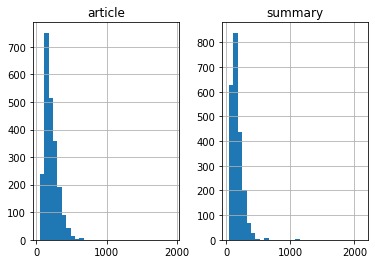

In [18]:
import matplotlib.pyplot as plt
article_word_count = []
summary_word_count = []

for i in df['cleaned_article']:
      article_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'article':article_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [19]:
import statistics
statistics.mode(article_word_count)


128

In [20]:

statistics.mode(summary_word_count)

90

In [0]:
max_len_article= 128
max_len_summary= 90

In [39]:
df['cleaned_article'][:10]

0    women mps reveal sexist taunts women mps endure shocking levels sexist abuse hands male counterparts new study shows male mps pretended juggle imaginary breasts jeered melons women made commons sp...
1    heading wrong way howard tony blair chance tackle problems facing britain failed michael howard said britain heading wrong direction conservative leader said new year message blair government boss...
2    blair stresses prosperity goals tony blair says party next manifesto unremittingly new labour aimed producing personal prosperity prime minister trying draw line speculation state relationship gor...
3    needs true immigration data former home office minister called independent body set monitor immigration barbara roche said organisation monitor publish figures independent government said would co...
4    ministers lose slopping case scottish executive lost appeal inmate compensation forced slop prison armed robber robert napier claimed suffered outbreak skin complaint eczema s

In [40]:
from sklearn.model_selection import train_test_split
X_list = df['cleaned_article']
Y_list = df['cleaned_summary']
Y_list
x_tr,x_val,y_tr,y_val=train_test_split(X_list,Y_list,test_size=0.2,random_state=0,shuffle=True) 
x_tr

841     tate lyle boss bags top award tate lyle chief executive named european businessman year leading business magazine iain ferguson awarded title publication forbes returning one venerable manufacture...
1747    vickery six nations england tight head prop phil vickery ruled rest rbs six nations breaking bone right forearm vickery injured club side gloucester beat bath west country derby saturday could joi...
2117    britain boosted holmes double athletics fans endured year mixed emotions stunning victories went hand hand disappointing defeats drugs scandals kelly holmes finally fulfilled potential storming do...
1174    long life promised laptop pcs scientists working ways ensure laptops stay powered entire working day building batteries new chemical mixes could boost power significantly say industry experts chan...
1502    german music zombie state german music business third largest world state zombie failed respond challenge posed downloading piracy leading industry figure said 

In [0]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(df['cleaned_article'],df['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True) 


In [0]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_article, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_article, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [0]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [55]:
x_voc_size

26066

In [56]:
y_voc_size

18266

In [0]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]


In [58]:
pip install keras==2.2.4

In [59]:
from keras import backend as K 

latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_article,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 128, 500)     13033000    input_5[0][0]                    
__________________________________________________________________________________________________
lstm_8 (LSTM)                   [(None, 128, 500), ( 2002000     embedding_4[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [0]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1)

In [70]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=100, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
21/21 [==============================] - 53s 3s/step - loss: 4.8898 - val_loss: 6.0533
Epoch 2/50
21/21 [==============================] - 54s 3s/step - loss: 4.7441 - val_loss: 6.0588
Epoch 3/50
21/21 [==============================] - 53s 3s/step - loss: 4.6092 - val_loss: 6.0860
Epoch 4/50
21/21 [==============================] - 53s 3s/step - loss: 4.4789 - val_loss: 6.0420
Epoch 5/50
21/21 [==============================] - 53s 3s/step - loss: 4.3343 - val_loss: 6.0651
Epoch 6/50
21/21 [==============================] - 53s 3s/step - loss: 4.2106 - val_loss: 6.0531
Epoch 7/50
21/21 [==============================] - 53s 3s/step - loss: 4.0860 - val_loss: 6.0715
Epoch 8/50
21/21 [==============================] - 53s 3s/step - loss: 3.9667 - val_loss: 6.1229
Epoch 9/50
21/21 [==============================] - 53s 3s/step - loss: 3.8372 - val_loss: 6.1176
Epoch 10/50
21/21 [==============================] - 53s 3s/step - loss: 3.7402 - val_loss: 6.0536
Epoch 11/50
21/21 [

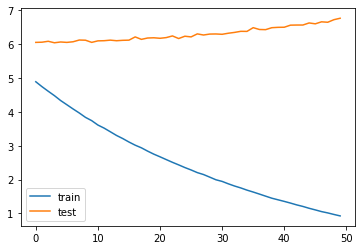

In [81]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [0]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [0]:
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_article,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
#attn_layer = AttentionLayer(name='attention_layer')
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [0]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [86]:
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_article)))
  print("\n")

Review: claimed brown asked take charge media strategy milburn would move behind scenes role labour always maintained brown would central campaign role many labour backbenchers said dissatisfied way election campaigning gone said wanted see chancellor take bigger role commentators say tories initiative putting labour back foot respond conservative policy announcements claims follow various opinion polls suggest tories gaining labour party strategists believed want bring brown centre stage seen support rise private polling budget last week another report sunday telegraph claims milburn unwilling allow new role chancellor come expense johnson told bbc news gordon brown play central role election campaign wrong said milburn ousting brown wrong saying brown ousting milburn work team milburn repeatedly said chancellor key campaign dismissed claims rift neither downing street labour party would comment directly reports 
Original summary: they would work as team report in the sunday business 

KeyError: ignored